In [13]:
library("plot3D")
library("gsl")
library('heavy')
nlon = 200;    # number of longitude points
nlat = 200;    # number of latitude points

phi = seq(0,2*pi,length=nlon);
theta = seq(0,pi,length=nlat);

coord = expand.grid(phi,theta);  
x = sin(coord[,2])*cos(coord[,1]);
y = sin(coord[,2])*sin(coord[,1]);
z = cos(coord[,2]);
num = length(x);
# print(num);  

In [14]:
Delta = matrix(c(0.5,0.1,0.1,0.5),2,2)
# Consideremos los parametros todos igual a 1
#parametros = matrix
Delta

0.5,0.1
0.1,0.5


In [15]:
Sigma = matrix(c(1,0,0,1), ncol = 2)

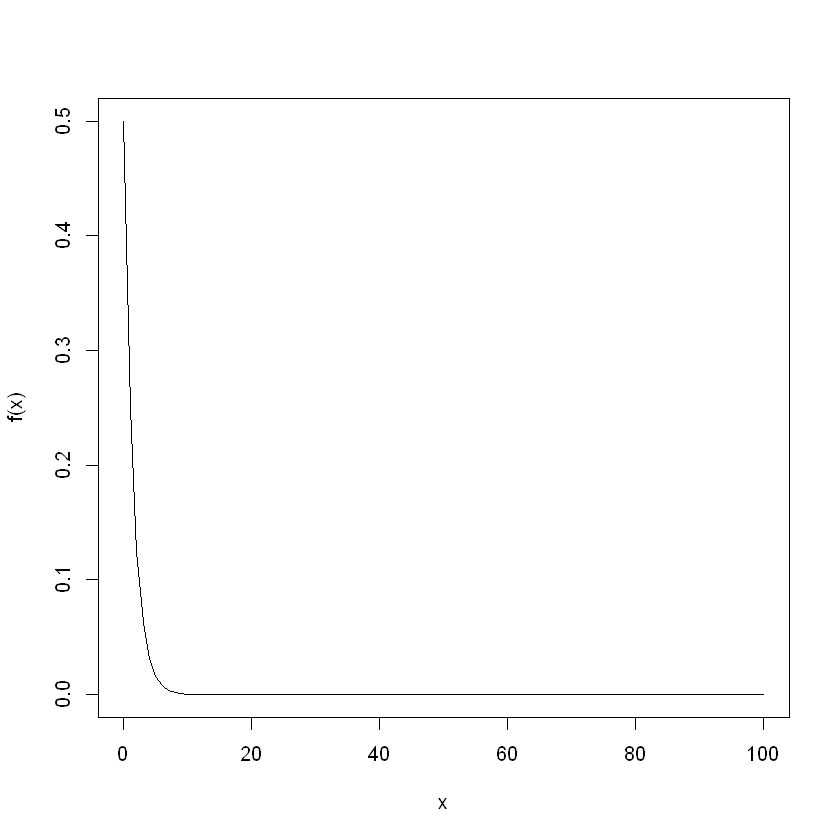

In [27]:
f = function(n) (1-Delta[1,1])*Delta[1,1]^n
curve(f(x),xlim=c(0,100))

In [18]:
Ntrunc = 30;     # Number of terms in the expansion
suma1 = array(dim=c(num,1),0);
suma2 = array(dim=c(num,1),0);

for(n in 0:Ntrunc){
    
## power spectrum matrix ##
bn = matrix(c(
    (1-Delta[1,1])*Delta[1,1]^n,0.5*(1-Delta[1,2])*Delta[1,2]^n,
    0.5*(1-Delta[2,1])*Delta[2,1]^n,(1-Delta[1,1])*Delta[2,2]^n
    ),2,2)
       
fact = t(chol(bn)) ; 
coef = fact%*%t(rmnorm(1,Sigma=Sigma))
  suma1  <-  suma1  + coef[1]*legendre_sphPlm(n,0,cos(coord[,2]))  ;
  suma2  <-  suma2  + coef[2]*legendre_sphPlm(n,0,cos(coord[,2]))  ;
     if(n>0){
        for(j in 1:n){
           coef1 = fact%*%t(rmnorm(1,Sigma=Sigma)) 
           coef2 = fact%*%t(rmnorm(1,Sigma=Sigma))

           ynm1 = legendre_sphPlm(n,j,cos(coord[,2])) * (  coef1[1]*cos(j*coord[,1]) +
                                                            coef2[1]*sin(j*coord[,1])  );
           suma1 <- suma1 +  sqrt(2)*ynm1;
            
           ynm2 = legendre_sphPlm(n,j,cos(coord[,2])) * (  coef1[2]*cos(j*coord[,1]) +
                                                            coef2[2]*sin(j*coord[,1])  );
           suma2 <- suma2 +  sqrt(2)*ynm2;
        }
     }
}

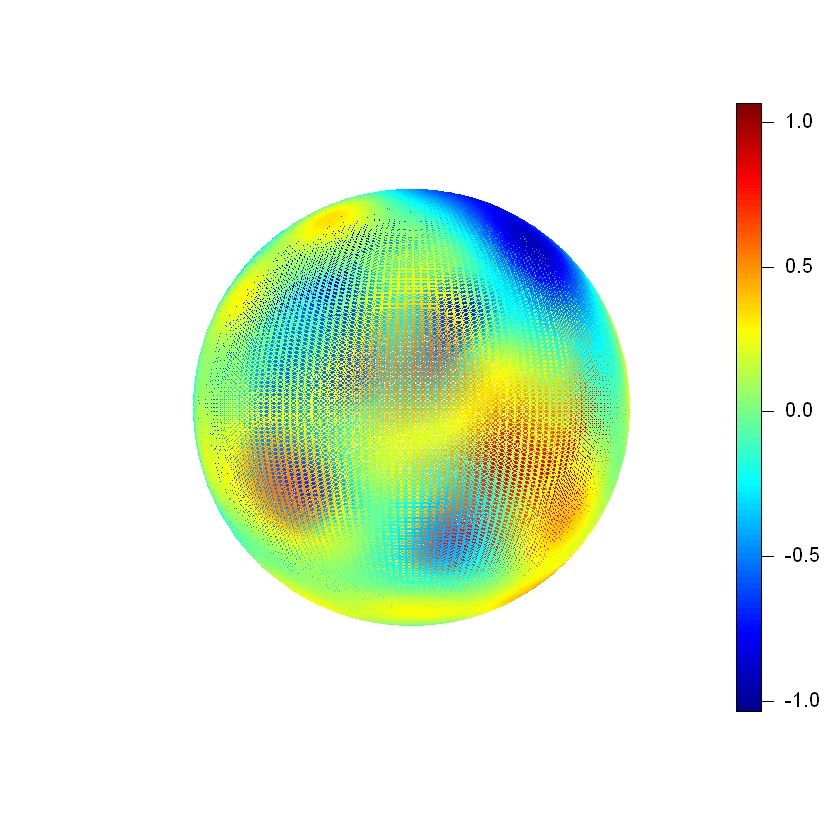

In [19]:
scatter3D(x,y,z,colvar=suma1,theta=0,phi=0,box=F);  # realization plot

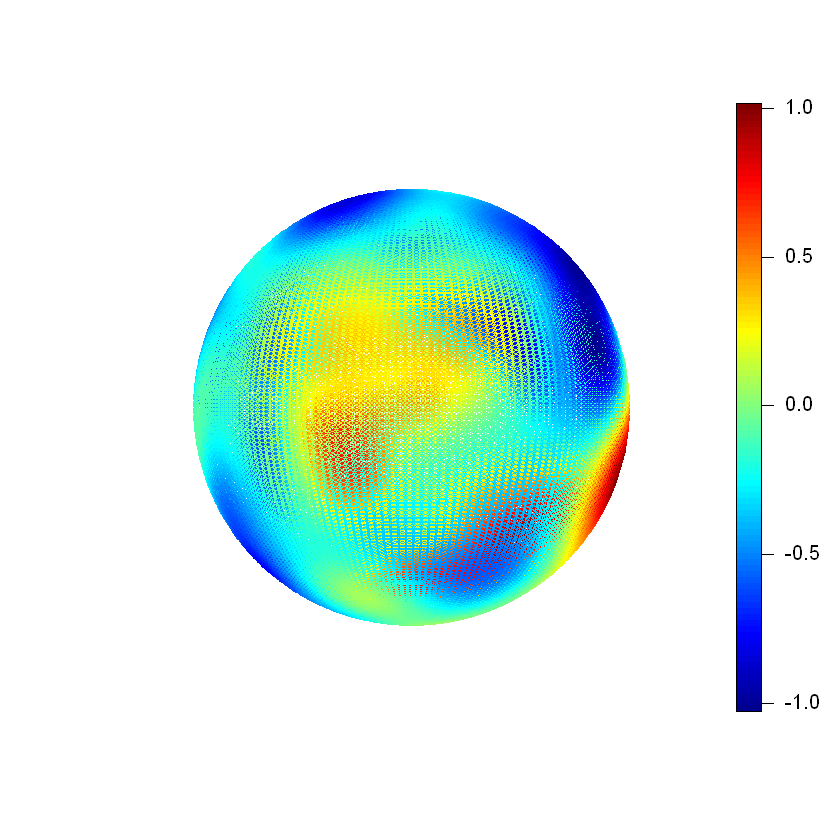

In [20]:
scatter3D(x,y,z,colvar=suma2,theta=0,phi=0,box=F);  # realization plot